In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("/content/ferti3.csv")
df.head()

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,phosphorus,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [7]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Moisture,0
Soil_Type,0
Crop_Type,0
Nitrogen,0
Potassium,0
phosphorus,0
Fertilizer,0


In [8]:
df.shape

(552, 9)

In [9]:
#checking unique values
df.nunique()

,0
Temperature,21
Humidity,34
Moisture,41
Soil_Type,5
Crop_Type,17
Nitrogen,47
Potassium,31
phosphorus,36
Fertilizer,14


In [10]:
df['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-2010'],
      dtype=object)

In [11]:
df['Crop_Type'].unique()

array(['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange'],
      dtype=object)

In [12]:
#statistical parameters
df.describe(include='all')

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,phosphorus,Fertilizer
count,552.000000,552.000000,552.000000,552,552,552.000000,552.000000,552.000000,552
unique,NaN,NaN,NaN,5,17,NaN,NaN,NaN,14
top,NaN,NaN,NaN,Loamy,Cotton,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,192,64,NaN,NaN,NaN,108
mean,28.630435,64.557971,42.840580,NaN,NaN,28.521739,10.144928,21.115942,NaN
std,5.088082,11.880236,11.507275,NaN,NaN,29.121989,13.456956,14.920514,NaN
min,0.000000,50.000000,25.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,26.000000,54.000000,33.000000,NaN,NaN,10.000000,0.000000,8.000000,NaN
50%,29.000000,62.000000,41.000000,NaN,NaN,15.000000,0.000000,20.000000,NaN
75%,32.000000,68.000000,51.000000,NaN,NaN,37.000000,18.000000,36.000000,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   phosphorus   552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [14]:
import numpy as np

def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Corrected the column name from 'Phosphorous' to 'Phosphorus'
numerical_features = ['Nitrogen', 'phosphorus', 'Potassium', 'Temperature']
for column in numerical_features:
    outliers = find_outliers_iqr(df[column])
    print(f"Outliers in {column}: {outliers}")

Outliers in Nitrogen: 0       90
25      85
26      80
27     110
28      86
30     100
31     109
40     117
41      92
42     114
48      78
57     126
58     102
63     116
64     117
138     90
139     90
140     90
213     85
214     85
215     85
216     80
217     80
218     80
219    110
220    110
221    110
222     86
223     86
224     86
228    100
229    100
230    100
231    109
232    109
233    109
258    117
259    117
260    117
261     92
262     92
263     92
264    114
265    114
266    114
282     78
283     78
284     78
309    126
310    126
311    126
312    102
313    102
314    102
327    116
328    116
329    116
330    117
331    117
332    117
Name: Nitrogen, dtype: int64
Outliers in phosphorus: Series([], Name: phosphorus, dtype: int64)
Outliers in Potassium: 0      49
1      59
33     48
43     47
57     46
138    49
139    49
140    49
141    59
142    59
143    59
237    48
238    48
239    48
267    47
268    47
269    47
309    46
310    46
311    46

In [15]:
df.drop(outliers)

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,phosphorus,Fertilizer
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea
5,31,62,32,Red,Tobacco,39,0,0,Urea
...,...,...,...,...,...,...,...,...,...
547,12,95,42,Sandy,orange,11,14,5,10-10-2010
548,12,95,42,Sandy,orange,11,14,5,10-10-2010
549,27,80,31,Clayey,kidneybeans,19,21,6,10-10-2010
550,27,80,31,Clayey,kidneybeans,19,21,6,10-10-2010


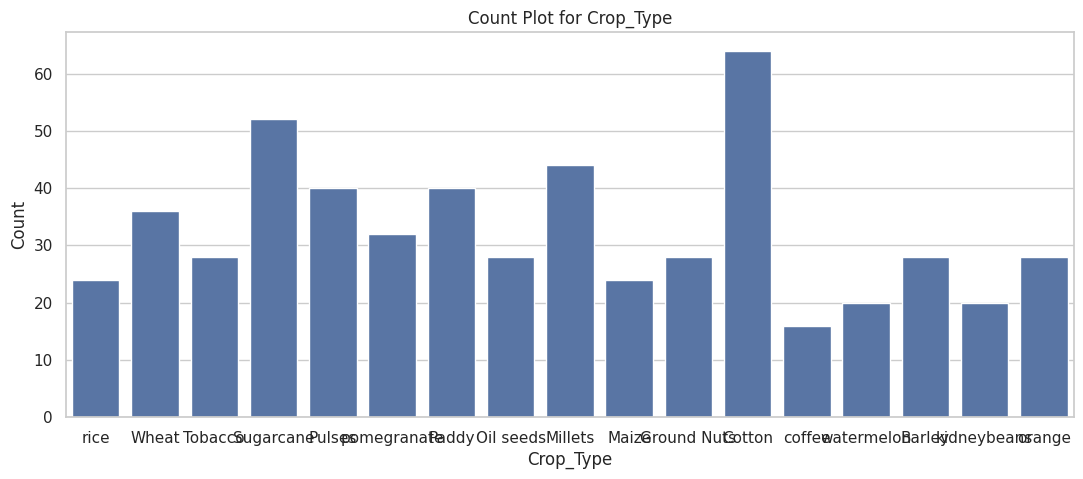

In [16]:
#The plot that shows the count (frequency) of each unique crop type in the dataset
#The x-axis represents the different crop types.
#The y-axis represents the count (the number of occurrences) of each crop type in the dataset
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=df, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

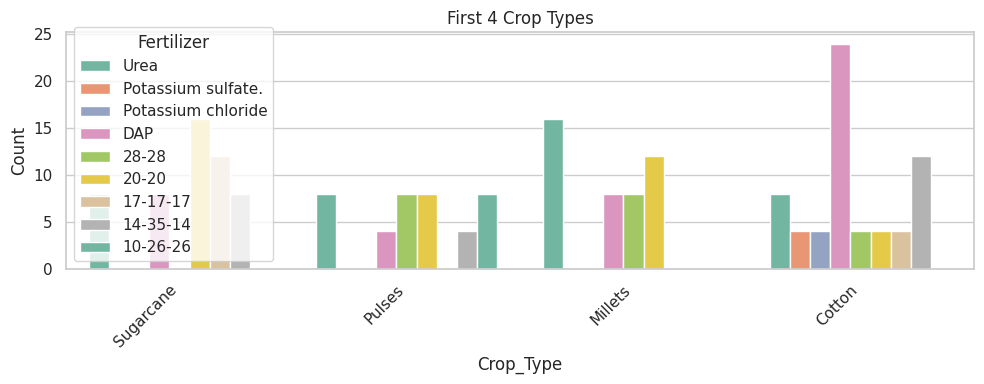

In [17]:
#first 4 crop types
part1_data = df[df['Crop_Type'].isin(df['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

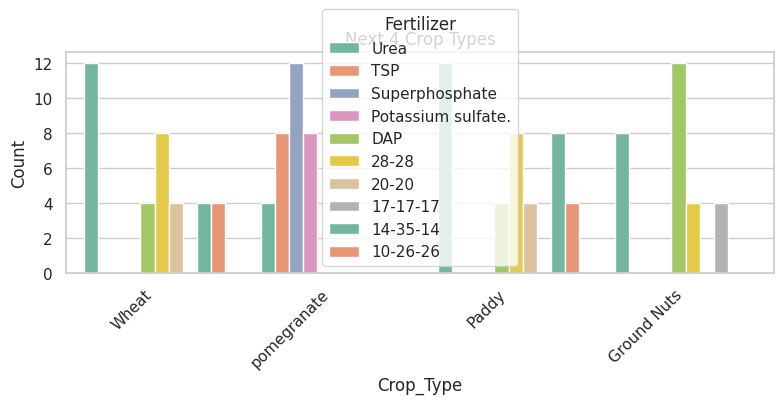

In [18]:
# Split the data into three parts: next 4 crop types
part2_data = df[df['Crop_Type'].isin(df['Crop_Type'].value_counts().index[4:8])]

# Create the second countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part2_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Next 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

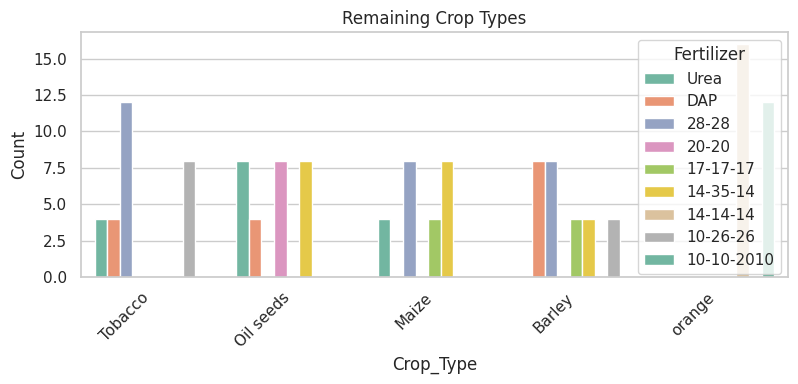

In [19]:
# Split the data into three parts: remaining crop types
part3_data = df[df['Crop_Type'].isin(df['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [21]:
corr = df.corr(numeric_only=True)
corr

,Temperature,Humidity,Moisture,Nitrogen,Potassium,phosphorus
Temperature,1.000000,-0.150666,0.106986,-0.251451,-0.407094,0.072380
Humidity,-0.150666,1.000000,0.023698,0.293293,0.543986,0.229961
Moisture,0.106986,0.023698,1.000000,0.002350,-0.070921,0.033679
Nitrogen,-0.251451,0.293293,0.002350,1.000000,0.539714,0.190089
Potassium,-0.407094,0.543986,-0.070921,0.539714,1.000000,0.288656
phosphorus,0.072380,0.229961,0.033679,0.190089,0.288656,1.000000


<Axes: >

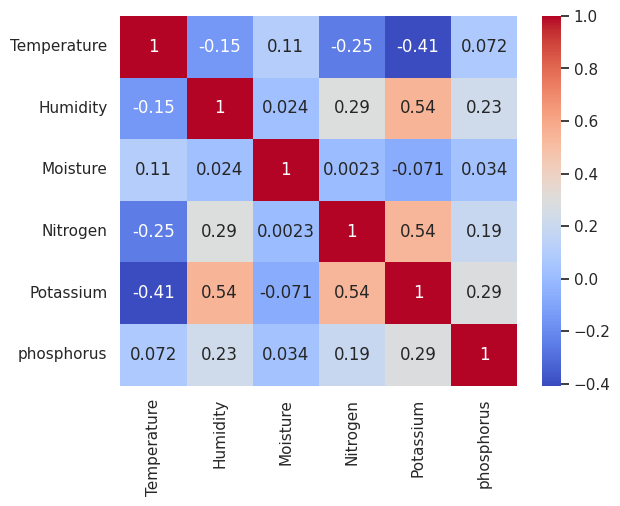

In [22]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [23]:
# categorical features  encoding
categorical_features = ['Soil_Type', 'Crop_Type']

encoder = OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore')

encoded_categorical = encoder.fit_transform(df[categorical_features])

In [24]:
# Create DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Combine with numerical features
X = pd.concat([df[numerical_features].reset_index(drop=True), encoded_df], axis=1)
y = df['Fertilizer']

In [25]:
# Initialize and fit the LabelEncoders
fertilizer_encoder = LabelEncoder()
y = fertilizer_encoder.fit_transform(y)

In [26]:
# here 20% of the data should be used for testing (evaluation), and the remaining 80% is used for training
#x_train and x_test = contain the features (independent variables) used for training and testing the model
#y_train and y_test = contains the labels(dependent variable) used for training and testing the model.

In [27]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 388 to 102
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nitrogen               441 non-null    float64
 1   phosphorus             441 non-null    float64
 2   Potassium              441 non-null    float64
 3   Temperature            441 non-null    float64
 4   Soil_Type_Clayey       441 non-null    float64
 5   Soil_Type_Loamy        441 non-null    float64
 6   Soil_Type_Red          441 non-null    float64
 7   Soil_Type_Sandy        441 non-null    float64
 8   Crop_Type_Cotton       441 non-null    float64
 9   Crop_Type_Ground Nuts  441 non-null    float64
 10  Crop_Type_Maize        441 non-null    float64
 11  Crop_Type_Millets      441 non-null    float64
 12  Crop_Type_Oil seeds    441 non-null    float64
 13  Crop_Type_Paddy        441 non-null    float64
 14  Crop_Type_Pulses       441 non-null    float64
 15  Crop_Type

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)
print("Classification Report for Fertilizer (SVM):\n", classification_report(y_test, y_pred_svm))


Classification Report for Fertilizer (SVM):
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        26
           8       0.88      0.88      0.88        16
          10       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         1
          12       0.71      1.00      0.83         5
          13       1.00      0.88      0.93        24

    accuracy                           0.92       111
   macro avg       0.80      0.87      0.82       111
weighted avg       0.94      0.92      0.92       111



In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create and train the KNN model
knn_model = KNeighborsClassifier()  # Initialize knn_model here
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
print("Classification Report for Fertilizer (KNN):\n", classification_report(y_test, y_pred_knn))


Classification Report for Fertilizer (KNN):
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.56      0.56      0.56         9
           2       0.67      1.00      0.80         4
           3       0.60      0.75      0.67         8
           4       1.00      1.00      1.00         2
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00         6
           7       1.00      0.92      0.96        26
           8       0.89      1.00      0.94        16
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         5
          13       1.00      0.92      0.96        24

    accuracy                           0.87       111
   macro avg       0.86      0.87      0.86       111
weighted avg       0.89      0.87      0.88       111



In [31]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200, random_state=42)
logistic_model.fit(X_train, y_train)
# Make predictions
# Changed 'logreg_model' to 'logistic_model'
y_pred_logreg = logistic_model.predict(X_test)
# Evaluate performance

print("Classification Report for Fertilizer (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))

Classification Report for Fertilizer (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.56      0.71         9
           2       1.00      1.00      1.00         4
           3       0.80      1.00      0.89         8
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        26
           8       0.79      0.94      0.86        16
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.60      0.60      0.60         5
          13       1.00      0.88      0.93        24

    accuracy                           0.88       111
   macro avg       0.73      0.75      0.73       111
weighted avg       0.90      0.88      0.88       111



In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)  # Initialize the model
tree_model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model and print the classification report
print("Classification Report for Fertilizer (Decision Tree):\n", classification_report(y_test, y_pred_tree))

Classification Report for Fertilizer (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        16
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00        24

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # Initialize the model
rf_model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model and print the classification report
print("Classification Report for Fertilizer (Random Forest):\n", classification_report(y_test, y_pred_rf))

Classification Report for Fertilizer (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        16
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00        24

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



In [34]:
def predict_fertilizer(model, encoder, fertilizer_encoder, categorical_features, numerical_features):
    # Get input values from the user
    Soil_Type = input("Enter Soil Type: ")
    Crop_Type = input("Enter Crop Type: ")
    Humidity = float(input("Enter Humidity: "))
    Moisture = float(input("Enter Moisture: "))
    Nitrogen = float(input("Enter Nitrogen level: "))
    phosphorus = float(input("Enter Phosphorus level: "))
    Potassium = float(input("Enter Potassium level: "))
    Temperature = float(input("Enter Temperature: "))
    # Create input data dictionary with consistent column names
    input_data = {
        'Soil_Type': Soil_Type,
        'Humidity': Humidity,
        'Moisture':Moisture,
        'Crop_Type': Crop_Type,
        'Nitrogen': Nitrogen,
        'phosphorus': phosphorus,
        'Potassium': Potassium,
        'Temperature': Temperature
    }
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])
    # One-hot encode categorical features
    encoded_input_features = encoder.transform(input_df[['Soil_Type', 'Crop_Type']])
    encoded_input_df = pd.DataFrame(encoded_input_features, columns=encoder.get_feature_names_out(['Soil_Type', 'Crop_Type']))
    #The following line was incorrectly indented
    numerical_input_df = input_df[numerical_features]  # Select numerical features
    input_X = pd.concat([numerical_input_df, encoded_input_df], axis=1)
    input_X = input_X[X_train.columns]
    # Make predictions
    predictions = model.predict(input_X)
    predicted_fertilizer = fertilizer_encoder.inverse_transform([predictions[0]])[0]  # Get the predicted fertilizer
    return predicted_fertilizer
model=rf_model
predicted_fertilizer = predict_fertilizer(model, encoder, fertilizer_encoder, categorical_features, numerical_features)
print(f"Predicted Fertilizer: {predicted_fertilizer}")

Enter Soil Type: clayey
Enter Crop Type: wheat
Enter Humidity: 34
Enter Moisture: 45
Enter Nitrogen level: 56
Enter Phosphorus level: 67
Enter Potassium level: 78
Enter Temperature: 45
Predicted Fertilizer: Potassium sulfate.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


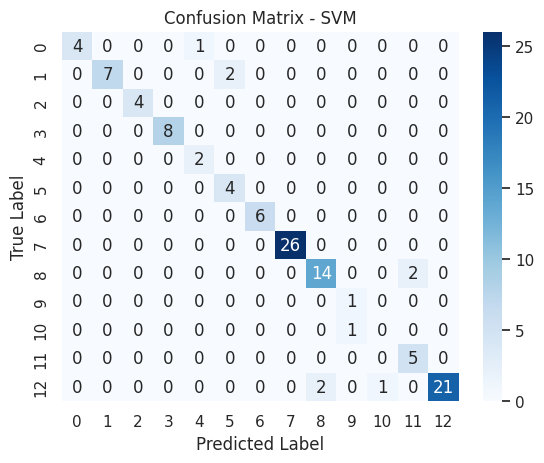

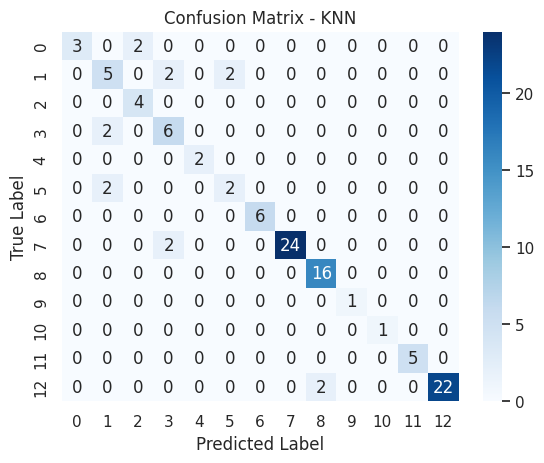

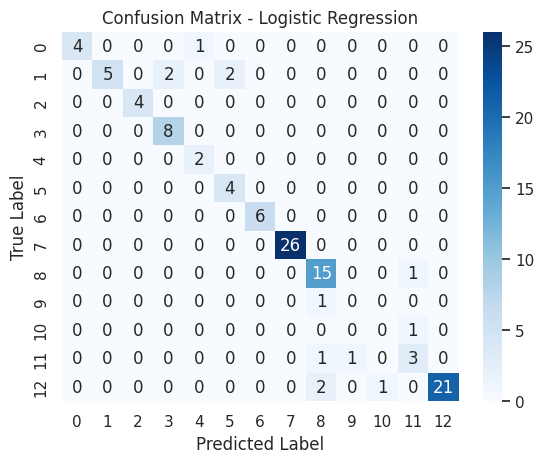

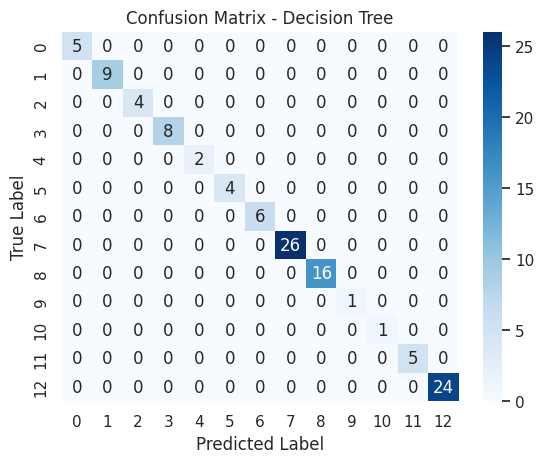

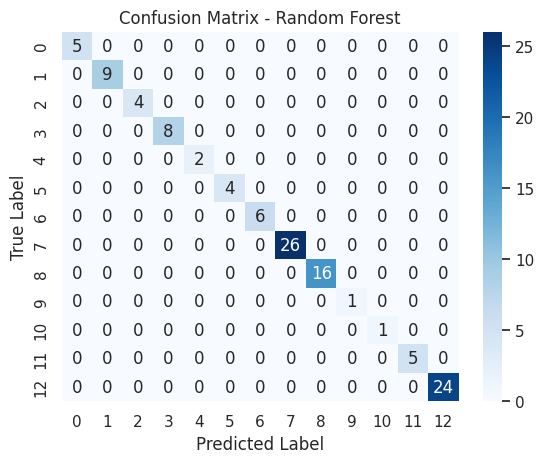

In [35]:
from sklearn.metrics import confusion_matrix
# For SVM:
cm_svm = confusion_matrix(y_test, y_pred_svm)

# For KNN:
cm_knn = confusion_matrix(y_test, y_pred_knn)

# For Logistic Regression:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# For Decision Tree:
cm_tree = confusion_matrix(y_test, y_pred_tree)

# For Random Forest:
cm_rf = confusion_matrix(y_test, y_pred_rf)
import seaborn as sns
import matplotlib.pyplot as plt

# For SVM:
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# For KNN:
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# For Logistic Regression:
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# For Decision Tree:
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# For Random Forest:
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




In [ ]:
df1=[['']]

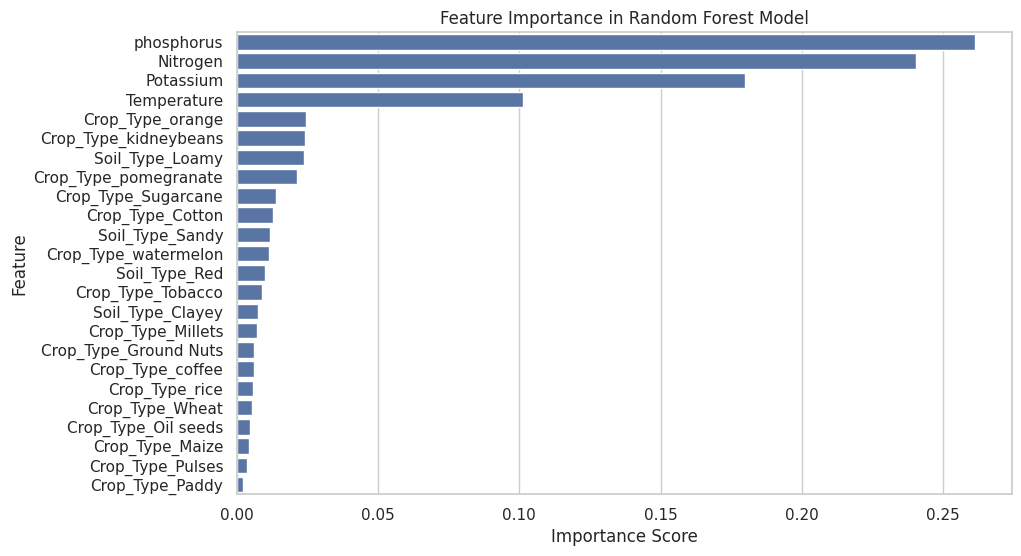

In [36]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [37]:
print("Classification Report for Fertilizer (SVM):\n", classification_report(y_test, y_pred_svm))
print("Classification Report for Fertilizer (KNN):\n", classification_report(y_test, y_pred_knn))
print("Classification Report for Fertilizer (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))
print("Classification Report for Fertilizer (Decision Tree):\n", classification_report(y_test, y_pred_tree))
print("Classification Report for Fertilizer (Random Forest):\n", classification_report(y_test, y_pred_rf))

Classification Report for Fertilizer (SVM):
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        26
           8       0.88      0.88      0.88        16
          10       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         1
          12       0.71      1.00      0.83         5
          13       1.00      0.88      0.93        24

    accuracy                           0.92       111
   macro avg       0.80      0.87      0.82       111
weighted avg       0.94      0.92      0.92       111

Classification Report for Fertiliz

<ipython-input-39-92e30e84fb0c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


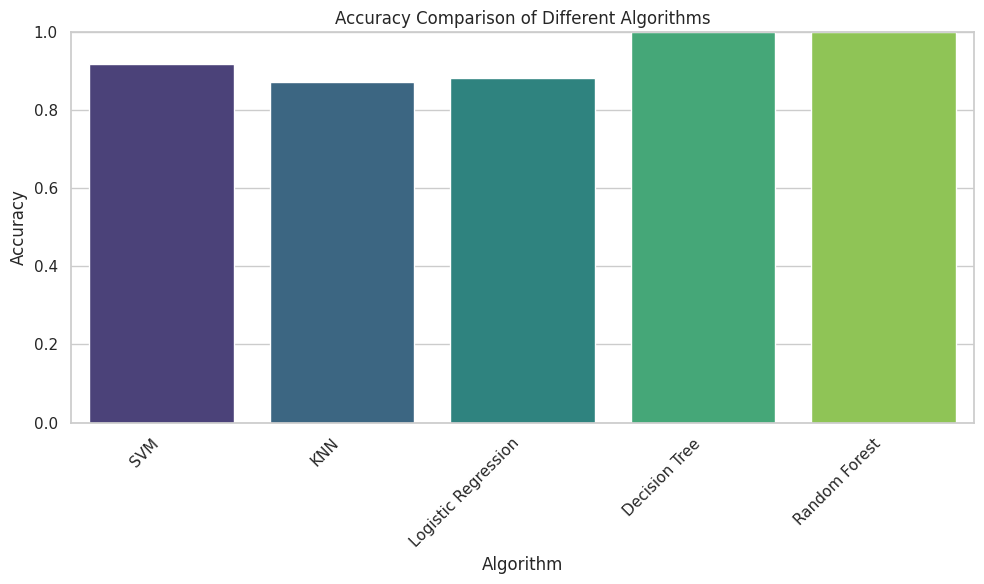

In [39]:
from sklearn.metrics import accuracy_score
svm_accuracy = accuracy_score(y_test, y_pred_svm)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

accuracy_scores = [svm_accuracy, knn_accuracy, logreg_accuracy, tree_accuracy, rf_accuracy]
model_names = ['SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title('Accuracy Comparison of Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ROC AUC Scores:
0: 1.0
1: 1.0
2: 1.0
3: 1.0
4: 1.0
5: 1.0
6: 1.0
7: 1.0
8: 1.0
9: nan
10: 1.0
11: 1.0
12: 1.0
13: 0.9999999999999999


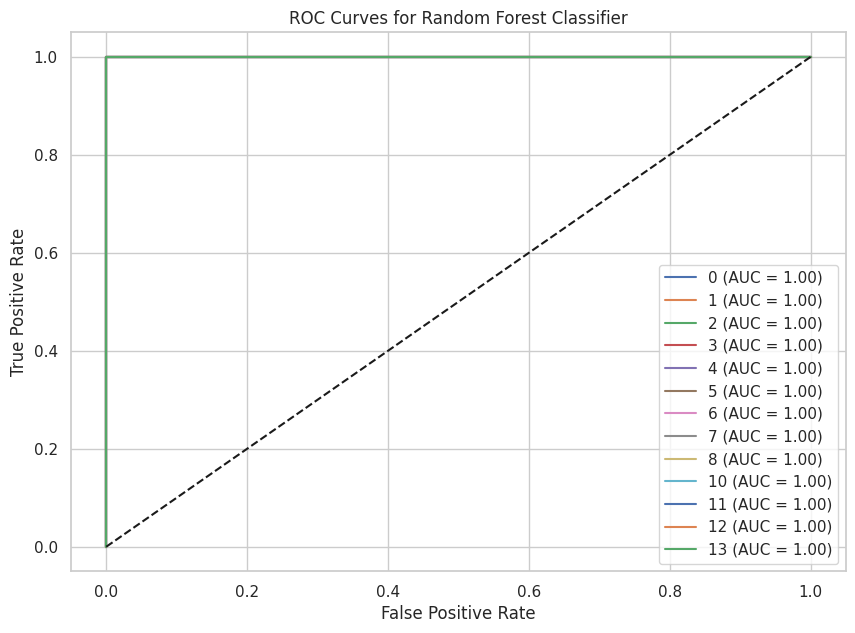

In [43]:
# Assuming you have your features in X_train and target in y_train
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters as needed
rf_classifier.fit(X_train, y_train)

# Calculate ROC AUC score for each class, handling cases with only one class
roc_auc_scores = {}
for class_label in rf_classifier.classes_:
    y_test_binary = (y_test == class_label).astype(int)

    # Check if both classes are present
    if len(np.unique(y_test_binary)) == 2:
        y_pred_proba = rf_classifier.predict_proba(X_test)[:, rf_classifier.classes_ == class_label]
        roc_auc_scores[class_label] = roc_auc_score(y_test_binary, y_pred_proba)
    else:
        print(f"Warning: Only one class present in y_test for class {class_label}. ROC AUC score cannot be calculated.")
        roc_auc_scores[class_label] = np.nan  # Or any other value to indicate the absence of a score

# Print ROC AUC scores
print("ROC AUC Scores:")
for class_label, score in roc_auc_scores.items():
    print(f"{class_label}: {score}")

# Plot ROC curves for each class (only for classes with valid ROC AUC scores)
plt.figure(figsize=(10, 7))
for class_label in rf_classifier.classes_:
    if not np.isnan(roc_auc_scores[class_label]):
        y_test_binary = (y_test == class_label).astype(int)
        y_pred_proba = rf_classifier.predict_proba(X_test)[:, rf_classifier.classes_ == class_label]
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{class_label} (AUC = {roc_auc_scores[class_label]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

In [48]:
# Assuming you have your trained model (e.g., rf_classifier from previous code)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import precision_score, recall_score, f1_score

y_pred = rf_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(accuracy,precision,recall,f1)

1.0 1.0 1.0 1.0
